#Import Libriers 

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

#Data Loading and Exploration

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
data_frame = pd.concat([train,test],axis = 0)

#This part loads training and testing data from CSV files, concatenates them into a single DataFrame df.

In [3]:
data_frame.head(10)

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
5,3,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...
6,3,Money Funds Fell in Latest Week (AP),AP - Assets of the nation's retail money marke...
7,3,Fed minutes show dissent over inflation (USATO...,USATODAY.com - Retail sales bounced back a bit...
8,3,Safety Net (Forbes.com),Forbes.com - After earning a PH.D. in Sociolog...
9,3,Wall St. Bears Claw Back Into the Black,"NEW YORK (Reuters) - Short-sellers, Wall Stre..."


In [4]:
# Defines lenght of dataset
len(data_frame)

127600

In [5]:
# provides data info
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  127600 non-null  int64 
 1   Title        127600 non-null  object
 2   Description  127600 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.9+ MB


In [6]:
# provides shape of dataset - 3 attribites and 127600 entity.
data_frame.shape

(127600, 3)

In [7]:
data_frame.describe()

,Class Index
count,127600.000000
mean,2.500000
std,1.118038
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


In [8]:
# checking the unique values of Class Index
data_frame['Class Index'].unique() 

array([3, 4, 2, 1])

#Data Preprocessing:

In [9]:
# Convert numerical labels to corresponding categories
data_frame['Class Index'].replace([1, 2, 3, 4], ['World', 'Sports', 'Business', 'Sci/Tech'], inplace=True)

In [10]:
# checking the unique values of Class Index after converting to categories.
data_frame['Class Index'].unique() 

array(['Business', 'Sci/Tech', 'Sports', 'World'], dtype=object)

In [11]:
data_frame.describe()

,Class Index,Title,Description
count,127600,127600,127600
unique,4,121258,126182
top,Business,Today's schedule,"With the economy slowly turning up, upgrading ..."
freq,31900,43,16


In [12]:
data_frame.head()

,Class Index,Title,Description
0,Business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,Business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,Business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,Business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,Business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [13]:
#Exploratory Data Analysis (EDA)

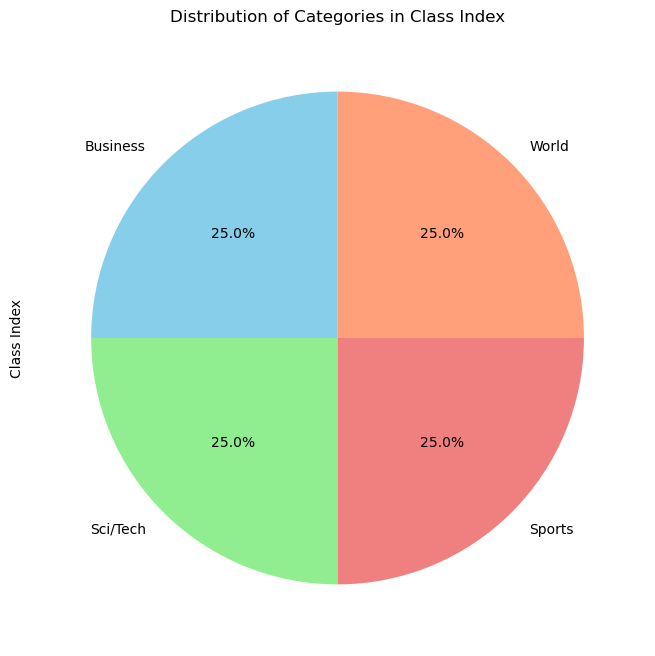

In [14]:
# Plot a pie chart for the distribution of categories
plt.figure(figsize=(8, 8))
data_frame['Class Index'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Distribution of Categories in Class Index')
plt.show()

In [15]:
# Count the occurrences of each category in 'Class Index'
category_counts = data_frame['Class Index'].groupby(data_frame['Class Index']).count()
print(category_counts)

Class Index
Business    31900
Sci/Tech    31900
Sports      31900
World       31900
Name: Class Index, dtype: int64


In [16]:
# checking for any null values
data_frame.isnull().sum()

Class Index    0
Title          0
Description    0
dtype: int64

#Text Preprocessing: Tokenizes, lemmatizes, and stems the text in 'Description' and 'Title' columns, then combines them into a single 'Text' column.

In [ ]:
# Tokenization, Lemmatization, and Stemming functions
def tokenize(text):
    return word_tokenize(text)

def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

def stem(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

# Apply tokenization, lemmatization, and stemming to 'Description' column
data_frame['Description'] = data_frame['Description'].apply(tokenize)
data_frame['Description'] = data_frame['Description'].apply(lemmatize)
data_frame['Description'] = data_frame['Description'].apply(stem)

# Apply tokenization, lemmatization, and stemming to 'Title' column
data_frame['Title'] = data_frame['Title'].apply(tokenize)
data_frame['Title'] = data_frame['Title'].apply(lemmatize)
data_frame['Title'] = data_frame['Title'].apply(stem)

# Example: Display processed 'Description' for the first few rows
print("Processed 'Description' for the first few rows:")
print(data_frame['Description'].head())

# Example: Display processed 'Title' for the first few rows
print("\nProcessed 'Title' for the first few rows:")
print(data_frame['Title'].head())

# Combining 'Title' and 'Description' into a single column
data_frame['Text'] = data_frame['Title'].apply(lambda x: ' '.join(x)) + ' ' + data_frame['Description'].apply(lambda x: ' '.join(x))

# Example: Display the combined 'Text' for the first few rows
print("\nCombined 'Text' for the first few rows:")
print(data_frame['Text'].head())


In [ ]:
data_frame.head()

# Train-Test Split:

In [ ]:
# Assuming 'Text' is the column containing the processed text data, and 'Class Index' is the target variable
X = data_frame['Text']
y = data_frame['Class Index']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

In [ ]:
X.head()

In [ ]:
y.head()

# Text Vectorization and Model Training:
Uses TF-IDF vectorization to convert text data into numerical format and trains a Multinomial Naive Bayes classifier.

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


SVM classifier #Training time can be longer, sensitivity to choice of kernel and hyperparameters

In [ ]:
# SVM Classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

In [ ]:
# Multinomial Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

In [ ]:
# Make predictions
y_pred_svm = svm_classifier.predict(X_test_tfidf)
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Model Evaluation

In [ ]:
# Evaluate SVM Classifier
print("SVM Classifier:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred_svm))
cm = confusion_matrix(y_test, y_pred_svm)
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',cmap="flare")
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
# Evaluate Multinomial Naive Bayes Classifier
print("\nMultinomial Naive Bayes Classifier:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred_nb))

cm1 = confusion_matrix(y_test, y_pred_nb)
#Plot the confusion matrix.
sns.heatmap(cm1,
            annot=True,
            fmt='g',cmap="flare")
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Text Classification Function:Defines a function classify_text to predict the category of new input text.

In [ ]:
# Function to classify new input text
def classify_text(text, model):
    # Convert the input text to TF-IDF vector
    text_tfidf = vectorizer.transform([text])

    # Classify the text using the specified model
    prediction = model.predict(text_tfidf)

    # Return the predicted category
    return prediction[0]

# Example Usage: Takes user input and predicts the category using the trained model.

In [ ]:
# user input
user_input = input("Enter a AG news article: ")

In [ ]:
# Example usage with Multinomial Naive Bayes
user_prediction_nb = classify_text(user_input, nb_classifier)
print(f"The predicted category for the input using Naive Bayes is: {user_prediction_nb}")

In [ ]:
# Example usage with SVM
user_prediction_svm = classify_text(user_input, svm_classifier)
print(f"The predicted category for the input using SVM is: {user_prediction_svm}")